In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ripser
from natsort import natsorted
from persim import PersistenceImager

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


Text(0.5, 1.0, 'Persistence image $H_0$')

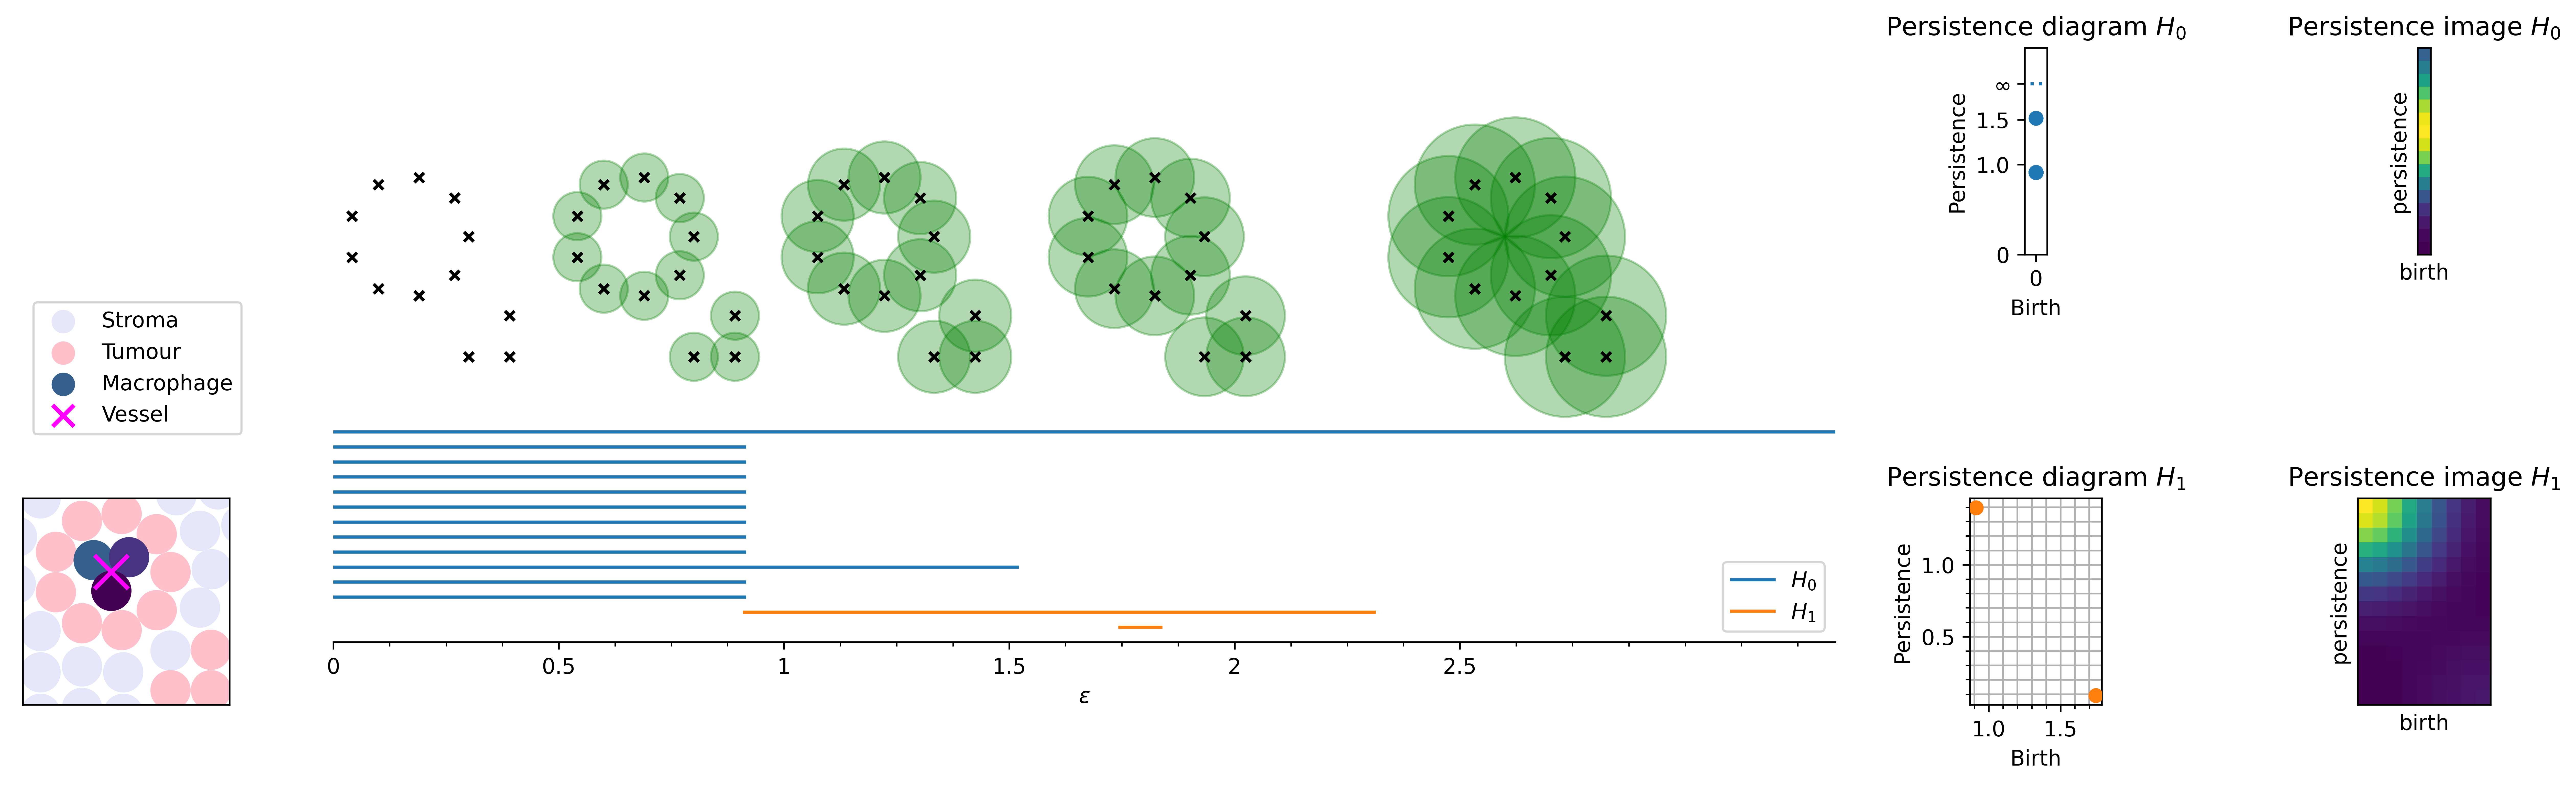

In [2]:
tumours = np.array([ [np.cos(theta), np.sin(theta)] for theta in np.linspace(0, 2*np.pi, 10)[:-1] ] + [[1,-2], [1+0.68404031,-2], [1+0.68404031,-2+0.68404031]] )
macrophages = np.array([ [-0.4,0.1],[0.2,0.15],[-0.1,-0.42] ]) + [0.1,0.1]
stromas = np.array([ [-1.2,1.25], [-1.6,0.6], [-1.62,-0.2], [-1.2,-1], [-1.2,-1.7], [-1.2,-2.4], [-0.5,-1.6], [-0.5,-2.3], [0.2,-1.7], [0.2,-2.4], [1,-1.33], [1.5,-0.6], [1.7,0.05], [1.5,.7], [2.2,.8], [1.1,1.3], [1.8,1.4] ])
vessels = np.array([[0,0]])

fig = plt.figure(figsize=(17.5,5), dpi=600, constrained_layout=True)

gs = fig.add_gridspec(2,7)
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[:, 1:5])
ax3 = fig.add_subplot(gs[0,5])
ax4 = fig.add_subplot(gs[1,5])
ax5 = fig.add_subplot(gs[0,6])
ax6 = fig.add_subplot(gs[1,6])

ax1.set_aspect('equal', adjustable='box')
ax1.scatter(stromas[:,0], stromas[:,1], c='lavender', s=320, label='Stroma')
ax1.scatter(tumours[:,0], tumours[:,1], c='pink', s=320, label='Tumour')
ax1.scatter(macrophages[:,0], macrophages[:,1], c=[0.7,0.85,1], cmap='viridis_r', vmin=0, vmax=1, s=320, label='Macrophage')
ax1.scatter(vessels[:,0], vessels[:,1], c='magenta', marker='x', s=250, linewidth=2, label='Vessel')
for handle in ax1.legend(bbox_to_anchor=(0, 2), loc="upper left").legendHandles: handle.set_sizes([100.])
ax1.set_xlim(-1.5,2); ax1.set_ylim(-2.25,1.25)
ax1.set_xticks([]); ax1.set_yticks([])

ax2.set_xlim(0, 25);
ax2.set_ylim(-6.75, 2.1);
ax2.set_aspect('equal', adjustable='box')
ax2.set_yticks([])
ticks = [0,0.5,1,1.5,2,2.5]
ax2.set_xticks([x/2/(4/3)*20 for x in ticks], ticks)
ax2.minorticks_on()
ax2.set_xlabel('$\epsilon$')
for x_offset,r in zip([-.25, 3.5, 7.5, 12, 18], [0, 0.8, 1.2, 1.3089968, 2]):
    for (x,y) in tumours+[1.5+x_offset,0]:
        ax2.add_patch(plt.Circle((x,y), r/2, color='green', alpha=0.3))
        ax2.scatter([x], [y], c='k', s=20, zorder=5, marker='x')
y=-3.25
ax2.plot([0,25], [y,y], c='tab:blue', label='$H_0$')
for _ in range(8):
    y -= 0.25
    ax2.plot([0,0.68404031/2*20], [y,y], c='tab:blue')
y -= .25
ax2.plot([0,1.13836598/2*20], [y,y], c='tab:blue')
y -= .25
ax2.plot([0,0.68404031/2*20], [y,y], c='tab:blue')
y -= .25
ax2.plot([0,0.68404031/2*20], [y,y], c='tab:blue')
y -= .25
ax2.plot([0.68404031/2*20,1.73205078/2*20], [y,y], c='tab:orange', label='$H_1$')
y -= .25
ax2.plot([1.3089968/2*20,1.37722933/2*20], [y,y], c='tab:orange')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.legend(loc="lower right")

tumours = tumours/3*4 # more faithful to the simulation
rips = ripser.Rips()
dgms = rips.fit_transform(tumours)

ax3.set_aspect('equal', adjustable='box')
scale=4
ax3.scatter(dgms[0][:,0], (dgms[0][:,1]-dgms[0][:,0]) *scale, c='tab:blue')
ax3.set_xlim(-.5, .5); ax3.set_xticks([0])
ax3.set_ylim(0, 2.3*scale); ax3.set_yticks(np.array([0, 1., 1.5, 1.9])*scale, [0, 1., 1.5, '$\infty$'])
ax3.hlines(y=1.9*scale, xmin=-1, xmax=1, linestyle='dotted', color='tab:blue')
# ax3.minorticks_on()
# ax3.grid(which='both')
ax3.set_xlabel('Birth')
ax3.set_ylabel('Persistence')
ax3.set_title('Persistence diagram $H_0$')

ax4.set_aspect('equal', adjustable='box')
ax4.minorticks_on()
ax4.grid(which='both')
ax4.scatter(dgms[1][:,0], (dgms[1][:,1]-dgms[1][:,0]), c='tab:orange', zorder=10)
ax4.set_xlabel('Birth')
ax4.set_ylabel('Persistence')
ax4.set_title('Persistence diagram $H_1$')

pimgr = PersistenceImager(pixel_size=.1)
pimgr.kernel_params = {'sigma': .1}
img = pimgr.fit_transform(dgms[1])
pimgr.plot_image(img, ax=ax6)
ax6.set_title('Persistence image $H_1$')

dgms[0][dgms[0] == np.inf] = 0
# dgms[0][:,0] += np.random.rand(len(dgms[0]))/10
dgms[0][0,0] += 0.01
img = pimgr.fit_transform(dgms[0])
pimgr.plot_image(img, ax5)
ax5.set_title('Persistence image $H_0$')

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


[array([[0.        , 0.9120537 ],
        [0.        , 0.9120537 ],
        [0.        , 0.9120537 ],
        [0.        , 0.9120537 ],
        [0.        , 0.9120537 ],
        [0.        , 0.9120537 ],
        [0.        , 0.9120537 ],
        [0.        , 0.9120537 ],
        [0.        , 0.91205376],
        [0.        , 0.91205376],
        [0.        , 1.51782131],
        [0.        ,        inf]]),
 array([[1.74532902, 1.83630574],
        [0.9120537 , 2.30940104]])]

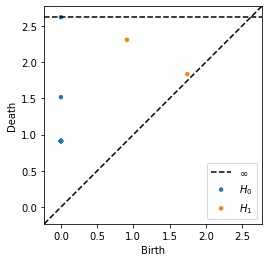

In [3]:
rips = ripser.Rips()
dgms = rips.fit_transform(tumours)
rips.plot(dgms)
dgms